In [16]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import time
from qiskit.providers.aer import QasmSimulator
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
#from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
import qiskit.circuit.library
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import RXXGate, RZZGate, RZXGate, XGate, SXGate, IGate, CCXGate, SGate
from datetime import datetime


# For simulation
from qiskit.providers.aer import AerSimulator

In [17]:
from qiskit import IBMQ
#IBMQ.save_account('befca44219528a564b7f4d3f53707de8985c22fb7b8c969ef2728c830de7c612716e76f41fbc0a52d65f63e71a3a2437948befd3042b1ffab4ced07d573192f1')
IBMQ.load_account()
IBMQ.providers()

ibmqfactory.load_account:WARNING:2022-06-04 16:57:49,561: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17')>,
 <AccountProvider for IBMQ(hub='ibm-q-community', group='qamp', project='spring-22-17-2')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='internal', project='reservations')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='squirl')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <AccountProvider for IBMQ(hub='qc-spring-22-4', group='group-4', project='recdZ7NwFc2tUZtMH')>]

In [19]:
backend.properties(datetime=datetime(2022,5,25,14)).gate_error('x',0)

0.00037279178464703515

In [18]:
provider=IBMQ.providers()[4]
#provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='spring-22-17')
#backend=provider.backend.ibmq_lima
backend = provider.get_backend('ibmq_guadalupe')

# get the basic feautures including qubit number of the backend.
config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

ibmq_guadalupe is on version 1.3.25. It has 16 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [15, 12]] are the list of connected qubits.ibmq_guadalupe can handle maximum 300 circuits(experiments) per job.Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is None.


In [15]:

from datetime import datetime
print(backend)
date= datetime(2022,5,25,14)
CLE=RBUtils.coherence_limit(nQ=1, T1_list=[backend.properties(datetime=date).t1(0)],
T2_list=[backend.properties(datetime=date).t2(0)], gatelen=backend.properties(datetime=date).gate_length('x',(0)))
print(f"CLE is {CLE} at {date}")

ibmq_guadalupe
CLE is 0.0002662814405564595 at 2022-05-25 14:00:00


In [10]:
date=datetime(2022,5,5,11,20)
CLE=RBUtils.coherence_limit(nQ=2, 
T1_list=[backend.properties(datetime=date).t1(1),backend.properties(datetime=date).t1(0)],
T2_list=[backend.properties(datetime=date).t2(1),backend.properties(datetime=date).t2(0)], 
gatelen=backend.properties().gate_length('cx',(0,1)))
print(f"CLE is {CLE} at {date}")

CLE is 0.003434953555994963 at 2022-05-05 11:20:00


ibmq_guadalupe


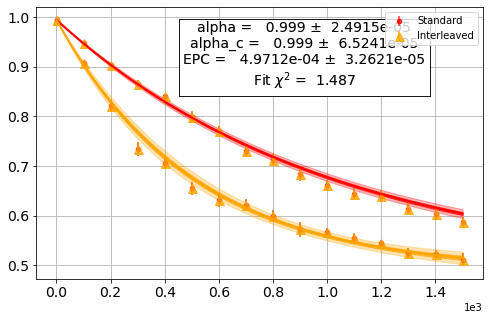

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.5048270562008275, 0.9990144126939433, 0.9990057672517714, 0.4895298003133952]
- χ²: 1.4868033268572982
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.999014+/-0.000025
- χ²: 1.4868033268572982
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.99901+/-0.00007
- χ²: 1.4868033268572982
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.000497+/-0.000033
- χ²: 1.4868033268572982
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [8]:
# **XGate
lengths = np.arange(1, 1600, 100)
num_samples = 10
seed = 1010
qubits = [0]
print(backend)

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.XGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

ibmq_guadalupe


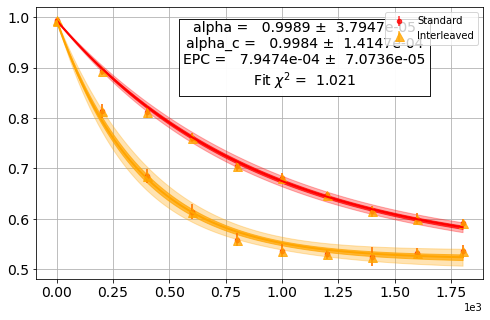

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.4732939557686172, 0.9988812357547632, 0.9984105288690514, 0.5204194225767965]
- χ²: 1.0208315636229575
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.99888+/-0.00004
- χ²: 1.0208315636229575
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.99841+/-0.00014
- χ²: 1.0208315636229575
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.00079+/-0.00007
- χ²: 1.0208315636229575
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [5]:
# **XGate
lengths = np.arange(1, 2000, 200)
num_samples = 10
seed = 1010
qubits = [0]
print(backend)

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.XGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

ibmq_guadalupe
2022-05-26 10:35:59.403726


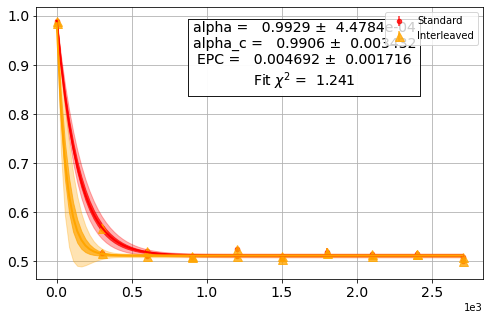

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.48120379081785214, 0.9929389372888647, 0.9906156238525663, 0.5115188867994731]
- χ²: 1.240550512959378
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9929+/-0.0004
- χ²: 1.240550512959378
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9906+/-0.0034
- χ²: 1.240550512959378
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0047+/-0.0017
- χ²: 1.240550512959378
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [11]:
# **SXGate
lengths = np.arange(1, 3000,300)
num_samples = 10
seed = 1010
qubits = [0]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.SXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

ibmq_guadalupe


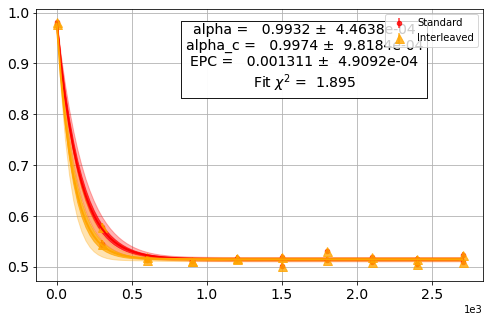

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.46820373225705686, 0.9931998535248696, 0.9973784941620756, 0.5150649610288379]
- χ²: 1.89528409767116
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9932+/-0.0004
- χ²: 1.89528409767116
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9974+/-0.0010
- χ²: 1.89528409767116
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0013+/-0.0005
- χ²: 1.89528409767116
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [13]:
# **XGate
lengths = np.arange(1, 3000,300)
num_samples = 10
seed = 1010
qubits = [0]
print(backend)

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.XGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

ibmq_guadalupe
2022-05-25 10:09:29.297089


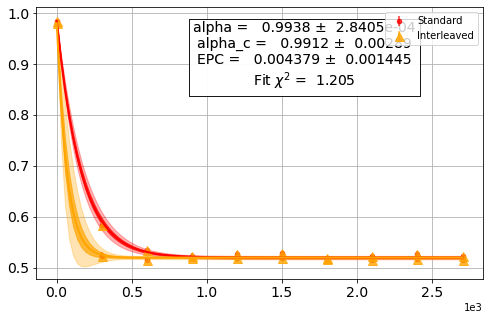

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.46724202282273697, 0.9937772043997779, 0.9912411663664286, 0.519608037344901]
- χ²: 1.2051432618812152
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.99378+/-0.00028
- χ²: 1.2051432618812152
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9912+/-0.0029
- χ²: 1.2051432618812152
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0044+/-0.0014
- χ²: 1.2051432618812152
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [16]:
# **IGate
lengths = np.arange(1, 3000,300)
num_samples = 10
seed = 1010
qubits = [0]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubit 0
# The interleaved gate is the x gate

int_exp1 = InterleavedRB(circuits.IGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

ibmq_guadalupe
2022-05-25 10:27:43.926524


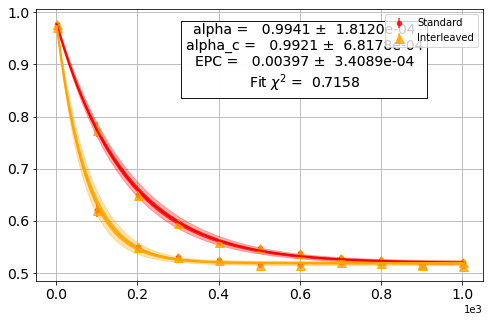

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.46107222000464343, 0.9941114909860322, 0.9920602647438296, 0.5187539766382524]
- χ²: 0.7157727441503654
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.99411+/-0.00018
- χ²: 0.7157727441503654
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9921+/-0.0007
- χ²: 0.7157727441503654
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.00397+/-0.00034
- χ²: 0.7157727441503654
- quality: good
- extra: <3 items>
- device_components: ['Q0']
- verified: False


In [17]:
# ** 1q Delay
lengths = np.arange(1, 1100, 100)
num_samples = 10
seed = 1010
qubits = [0]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubit 0
duration=backend.properties().gate_length('x',0)/backend.configuration().dt
interleaved_element = Delay(duration, unit="dt")
int_exp1 = InterleavedRB(interleaved_element, qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata1 = int_exp1.run(backend, shots=1000).block_for_results()
int_results1 = int_expdata1.analysis_results()
# View result data
display(int_expdata1.figure(0))
for result in int_results1:
    print(result)

# guadalpue_q0,1
- CLE(0.003940)<CX(0.001645)<2qDelay(0.04376)

In [5]:
date= datetime.today()
qubit='guadalupe_q01'
guadalupe_q01=RBUtils.coherence_limit_error(2, 
backend.properties().gate_length('cx',(0,1)),
 t1s=[backend.properties().t1(0),backend.properties().t1(1)], 
 t2s=[backend.properties().t1(0),backend.properties().t1(1)])

print(f'{qubit} CLE is {guadalupe_q01} on {date}')

guadalupe_q01 CLE is 0.003940565280607977 on 2022-05-30 12:02:08.269709


ibmq_guadalupe
2022-05-25 11:14:37.687568


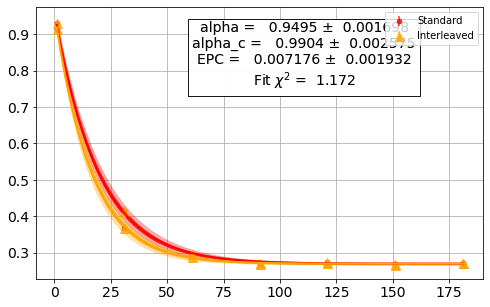

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6913451938065422, 0.9494606688609233, 0.9904317441673078, 0.2694559730536524]
- χ²: 1.1718800796684847
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9495+/-0.0017
- χ²: 1.1718800796684847
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9904+/-0.0026
- χ²: 1.1718800796684847
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0072+/-0.0019
- χ²: 1.1718800796684847
- quality: good
- extra: <3 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [18]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [0,1]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubits 0, 1
# The interleaved gate is the cx gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

ibmq_guadalupe
2022-05-27 15:57:00.665520


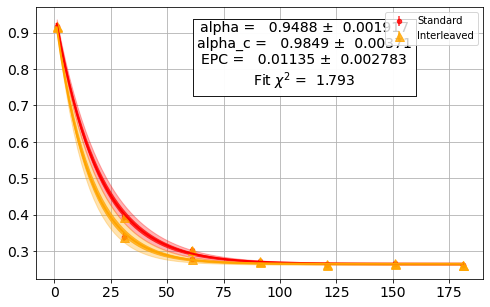

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6941995411200795, 0.9488265745577883, 0.9848703024301585, 0.26537495763525404]
- χ²: 1.792686243523135
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9488+/-0.0019
- χ²: 1.792686243523135
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.985+/-0.004
- χ²: 1.792686243523135
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0113+/-0.0028
- χ²: 1.792686243523135
- quality: good
- extra: <3 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [21]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [0,1]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubits 0, 1
# The interleaved gate is the cx gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

ibmq_guadalupe
2022-05-27 15:24:58.004688


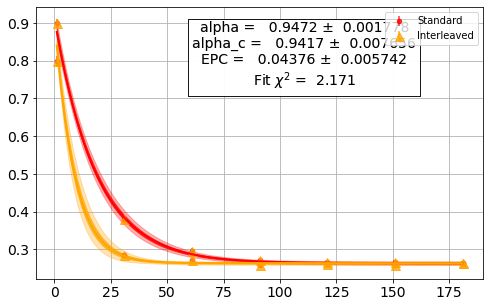

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.646855074666194, 0.9471972415235257, 0.9416570430000506, 0.26334053557571213]
- χ²: 2.170531432582899
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9472+/-0.0018
- χ²: 2.170531432582899
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.942+/-0.008
- χ²: 2.170531432582899
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.044+/-0.006
- χ²: 2.170531432582899
- quality: good
- extra: <3 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [20]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [0,1]
print(backend)
print(datetime.today())

duration=backend.properties().gate_length('cx',(0,1))/backend.configuration().dt
delay_qc = QuantumCircuit(2)
delay_qc.delay(round(duration), [0], unit="dt")
delay_qc.delay(round(duration), [1], unit="dt")
int_exp2 = InterleavedRB(
    interleaved_element=delay_qc, qubits=[0,1], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

ibmq_guadalupe
2022-05-25 12:03:14.132110


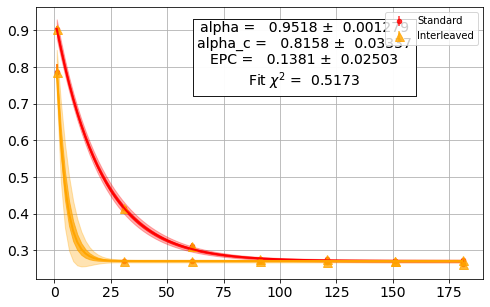

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6652929750466174, 0.9517700687771792, 0.8158434505689498, 0.2707518652351032]
- χ²: 0.5172898290203326
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9518+/-0.0013
- χ²: 0.5172898290203326
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.816+/-0.033
- χ²: 0.5172898290203326
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.138+/-0.025
- χ²: 0.5172898290203326
- quality: good
- extra: <3 items>
- device_components: ['Q0', 'Q1']
- verified: False


In [20]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [0,1]
print(backend)
print(datetime.today())

duration=backend.properties().gate_length('cx',(0,1))/backend.configuration().dt
delay_qc = QuantumCircuit(2)
delay_qc.delay(round(duration), [0], unit="dt")
delay_qc.delay(round(duration), [1], unit="dt")
int_exp2 = InterleavedRB(
    interleaved_element=delay_qc, qubits=[0,1], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

# guadalupe_q3,5
- CLE(0.007621)<CX(0.01139)<2qDelay(0.0149)

In [6]:
date= datetime.today()
qubit='guadalupe_35'
guadalupe_35=RBUtils.coherence_limit_error(2, 
backend.properties().gate_length('cx',(3,5)),
 t1s=[backend.properties().t1(5),backend.properties().t1(5)], 
 t2s=[backend.properties().t1(5),backend.properties().t1(5)])

print(f'{qubit} CLE is {guadalupe_35} on {date}')

guadalupe_35 CLE is 0.007621349627453533 on 2022-05-30 12:04:35.988929


ibmq_guadalupe
2022-05-27 16:12:46.764132


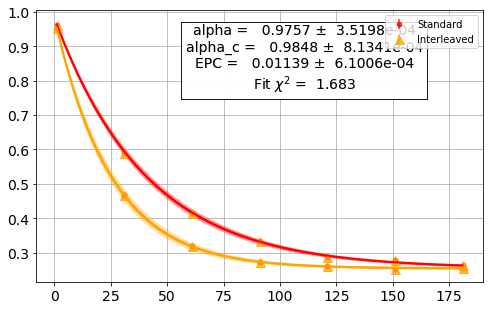

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.727189436504302, 0.9757192771186988, 0.9848160880617508, 0.25412934813800486]
- χ²: 1.6833596610086488
- quality: good
- extra: <4 items>
- device_components: ['Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.97572+/-0.00035
- χ²: 1.6833596610086488
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9848+/-0.0008
- χ²: 1.6833596610086488
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0114+/-0.0006
- χ²: 1.6833596610086488
- quality: good
- extra: <3 items>
- device_components: ['Q3', 'Q5']
- verified: False


In [22]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [3,5]
print(backend)
print(datetime.today())

# Run an Interleaved RB experiment on qubits 0, 1
# The interleaved gate is the cx gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

# Run
int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

ibmq_guadalupe
2022-05-26 11:36:12.031455


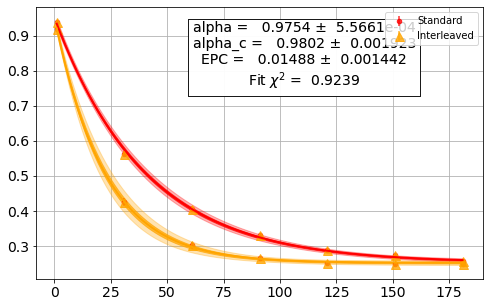

DbAnalysisResultV1
- name: @Parameters_InterleavedRBAnalysis
- value: [0.6995877017704412, 0.9754181135651336, 0.9801630686404089, 0.2515876012960354]
- χ²: 0.9239493599972125
- quality: good
- extra: <4 items>
- device_components: ['Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9754+/-0.0006
- χ²: 0.9239493599972125
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha_c
- value: 0.9802+/-0.0019
- χ²: 0.9239493599972125
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0149+/-0.0014
- χ²: 0.9239493599972125
- quality: good
- extra: <3 items>
- device_components: ['Q3', 'Q5']
- verified: False


In [19]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = [3,5]
print(backend)
print(datetime.today())

duration=backend.properties().gate_length('cx',(3,5))/backend.configuration().dt
delay_qc = QuantumCircuit(2)
delay_qc.delay(round(duration), [0], unit="dt")
delay_qc.delay(round(duration), [1], unit="dt")
int_exp2 = InterleavedRB(
    interleaved_element=delay_qc, qubits=[3,5], lengths=lengths, num_samples=num_samples, seed=seed)
int_exp2.set_transpile_options(scheduling_method='asap')
# Run
int_expdata2 = int_exp2.run(backend, shots=1000).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)